# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
file_name = 'C:\Learning\DataAnalyst\prosperLoanData.csv'
with open(file_name) as f:
    file_encoding = f.encoding

df = pd.read_csv(file_name, encoding = file_encoding)

df.BorrowerAPR = df.BorrowerAPR.fillna(0)
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df['CreditRating'] = df.CreditGrade.fillna(df['ProsperRating (Alpha)'])

# convert the credit grade column into an ordered categorical data type  
grade_sort = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
ordered_grade = pd.api.types.CategoricalDtype(ordered = True, categories = grade_sort)
df['CreditRating'] = df.CreditRating.astype(ordered_grade)

# convert the IncomeRange column into an ordered categorical data type
OrderedIncomeRange = ['Not displayed','Not employed','$0', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
OrderedIncomeRange = pd.api.types.CategoricalDtype(ordered = True, categories = OrderedIncomeRange)
df['OrderedIncomeRange'] = df.IncomeRange.astype(OrderedIncomeRange)

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditRating,OrderedIncomeRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,C,"$25,000-49,999"
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,A,"$50,000-74,999"
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,HR,Not displayed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,A,"$25,000-49,999"
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,D,"$100,000+"


# Bar Charts
Used to plot Qualitative or categorical types (non-numeric types)
    1. Nominal data: pure labels without inherent order 
    2. Ordinal data: labels with an intrinsic order or ranking 

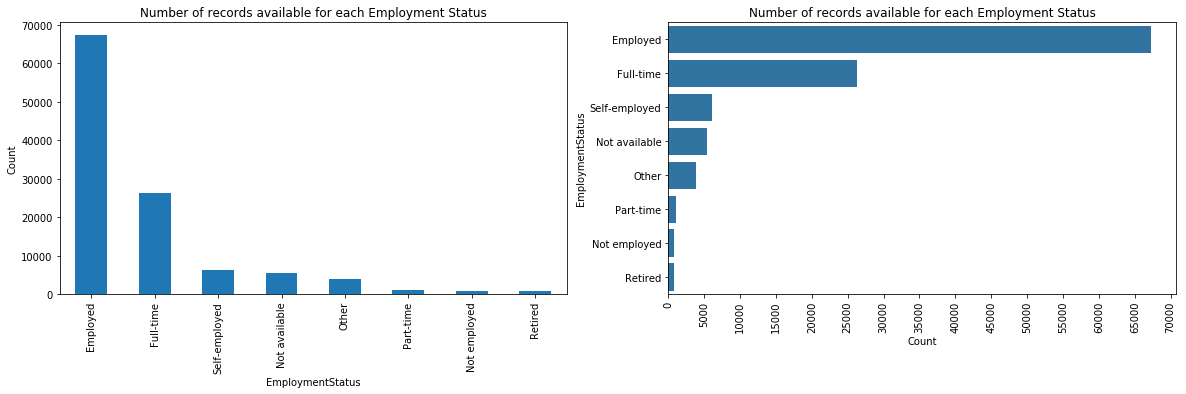

In [3]:
# Nominal data
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# Simple bar char for value count 
df.EmploymentStatus.value_counts().plot.bar(color = sb.color_palette()[0])
plt.title('Number of records available for each Employment Status')
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# Same plot with few variations using seaborn
sb.countplot(data = df, y = 'EmploymentStatus', order = df.EmploymentStatus.value_counts().index, color = sb.color_palette()[0])
plt.xticks(np.arange(0, 70001, 5000))
plt.xticks(rotation = 90)
plt.title('Number of records available for each Employment Status')
plt.xlabel('Count');

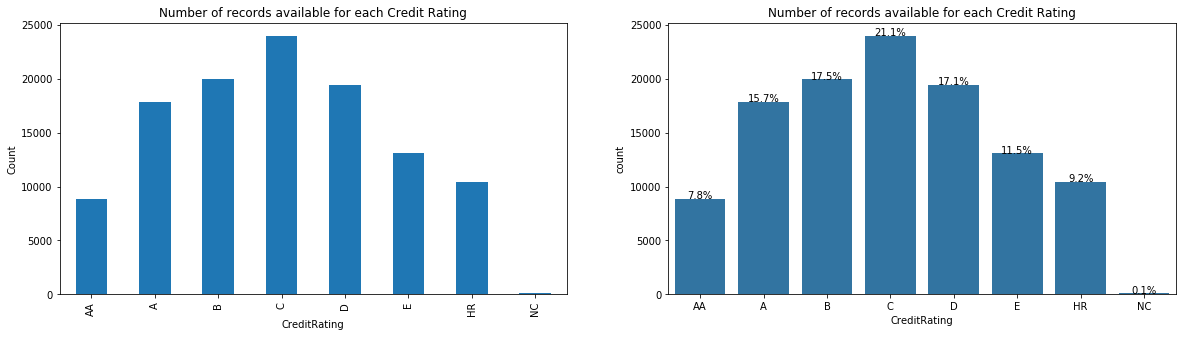

In [4]:
# Ordinal data
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# simple bar chart with sort order 
df.CreditRating.value_counts().reindex(grade_sort).plot.bar(color = sb.color_palette()[0])
plt.title('Number of records available for each Credit Rating')
plt.xlabel('CreditRating')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# plot the same using seaborn with annotations
sb.countplot(data = df, x = 'CreditRating', color = sb.color_palette()[0])
plt.title('Number of records available for each Credit Rating')

# add annotations
n_points = df.shape[0]
tmp_grade = df.CreditRating.value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = tmp_grade[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va ='baseline', color = 'black')

# Adapted Bar Charts
* seaborn's barplot - The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.
* seaborn's pointplot - used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

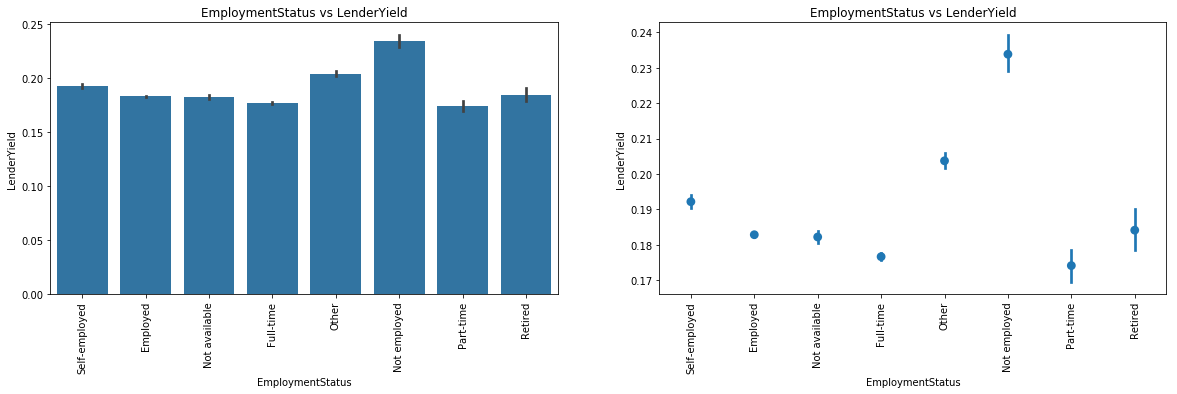

In [5]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.barplot(data = df, x = 'EmploymentStatus', y = 'LenderYield', color = sb.color_palette()[0])
plt.xticks(rotation = 90)
plt.title('EmploymentStatus vs LenderYield')

plt.subplot(1, 2, 2)
sb.pointplot(data = df, x = 'EmploymentStatus', y = 'LenderYield', linestyles = "") # remove linestyles = "" for nominal data
plt.xticks(rotation = 90)
plt.title('EmploymentStatus vs LenderYield');

# Clustered Bar Charts


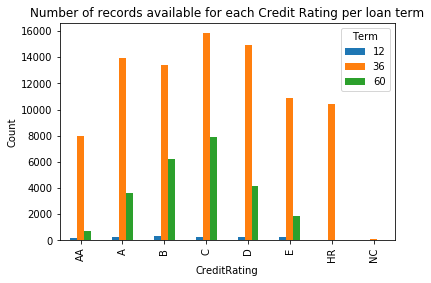

In [6]:
ct_counts = df.groupby(['CreditRating', 'Term']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'CreditRating', columns = 'Term', values = 'count').fillna(0)
ct_counts.plot.bar()
plt.ylabel('Count')
plt.title('Number of records available for each Credit Rating per loan term');

# Stacked Bar Charts

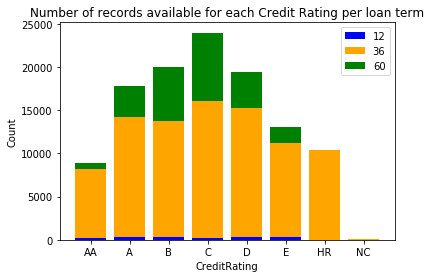

In [7]:
p60 = plt.bar(ct_counts.index, ct_counts.iloc[:,0] + ct_counts.iloc[:,1] + ct_counts.iloc[:,2], color='green')
p36 = plt.bar(ct_counts.index, ct_counts.iloc[:,0] + ct_counts.iloc[:,1], color='orange')
p12 = plt.bar(ct_counts.index, ct_counts.iloc[:,0], color='blue')
plt.legend((p12, p36, p60), ('12', '36', '60'))
plt.xlabel('CreditRating')
plt.ylabel('Count')
plt.title('Number of records available for each Credit Rating per loan term');

# Pie Charts
Used to plot Qualitative or categorical types (non-numeric types), but
 - each category should represent parts of a whole
 - works best with two or three slices

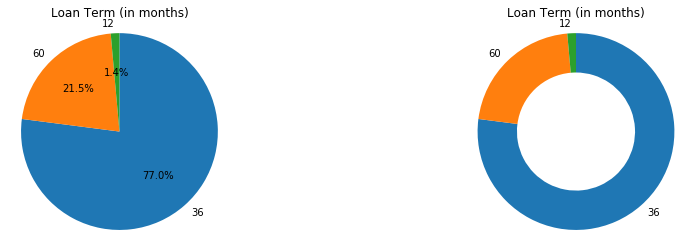

In [8]:
plt.figure(figsize = [15, 4])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.pie(df.Term.value_counts(), 
        startangle = 90, #start the first slice at vertically upwards 
        counterclock = False, #plot the sorted counts in a clockwise fashion
        labels = df.Term.value_counts().index,
        autopct='%1.1f%%'); 
plt.axis('square')
plt.title('Loan Term (in months)');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# same plot in donut chart
plt.pie(df.Term.value_counts(), startangle = 90, counterclock = False, 
        labels = df.Term.value_counts().index, wedgeprops = {'width' : 0.4} ); 
plt.axis('square')
plt.title('Loan Term (in months)');

# Histograms
Used to plot the distribution of a Quantitative or numeric types
 - For Continuous quantitative variable, there should be no gap between the bars
 - For Discrete quantitative variable, gap between bars emphasize that the data is discrete 

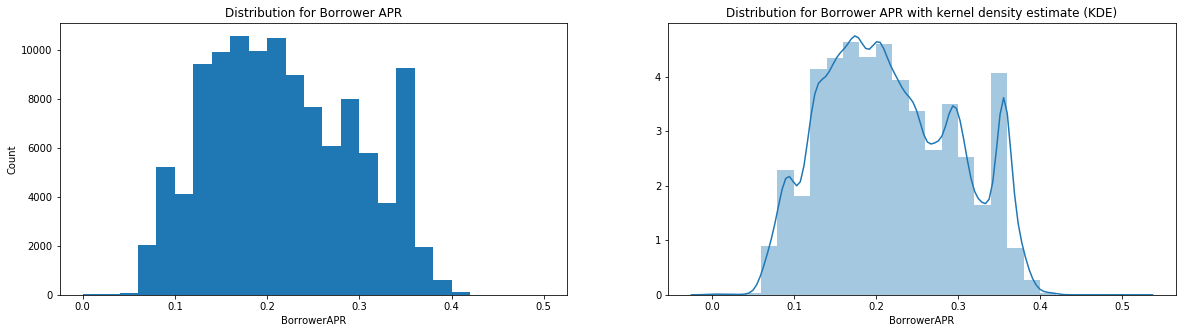

In [9]:
# Continuous data
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df.BorrowerAPR.max() + 0.0001, 0.02)
plt.hist(data = df[df.BorrowerAPR.isna() == False], x = 'BorrowerAPR', bins = bin_edges)
plt.title('Distribution for Borrower APR')
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# same plot using seaborn
sb.distplot(df.BorrowerAPR.dropna(), bins = bin_edges); #,kde = False, hist_kws = {'alpha' : 1})
plt.title('Distribution for Borrower APR with kernel density estimate (KDE)');

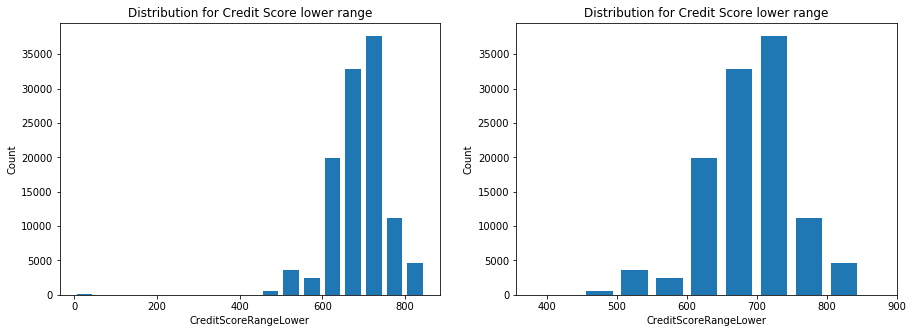

In [10]:
# Discrete data
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df.CreditScoreRangeLower.max() + 10, 50)
plt.hist(data = df[df.CreditScoreRangeLower.isna() == False], x = 'CreditScoreRangeLower', bins = bin_edges, rwidth = 0.75)
# with rwidth = 0.75 parameter to the above histogram, the bars will take up 70% of the space, which emphasize that the data is discrete 
plt.title('Distribution for Credit Score lower range')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data = df[df.CreditScoreRangeLower.isna() == False], x = 'CreditScoreRangeLower', bins = bin_edges, rwidth = 0.75)
plt.xlim(356, 900) # Limit x axis to remove outliers 
plt.title('Distribution for Credit Score lower range')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Count');

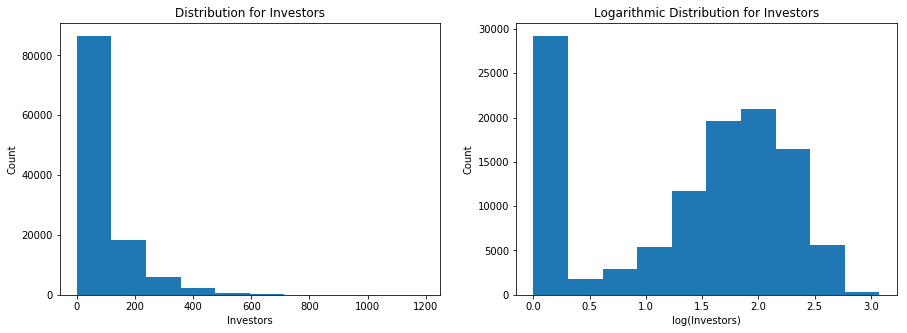

In [11]:
# Transform the data
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(df[df.Investors.isna() == False].Investors)
plt.title('Distribution for Investors')
plt.xlabel('Investors')
plt.ylabel('Count')

# In the above plot, the data is highly skewed
# So, applying a logarithmic transform, the data will follow a normal distribution
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(np.log10(df[df.Investors.isna() == False].Investors))
plt.title('Logarithmic Distribution for Investors')
plt.xlabel('log(Investors)')
plt.ylabel('Count');

# Scatterplots
Inspect the relationship between two numeric variables

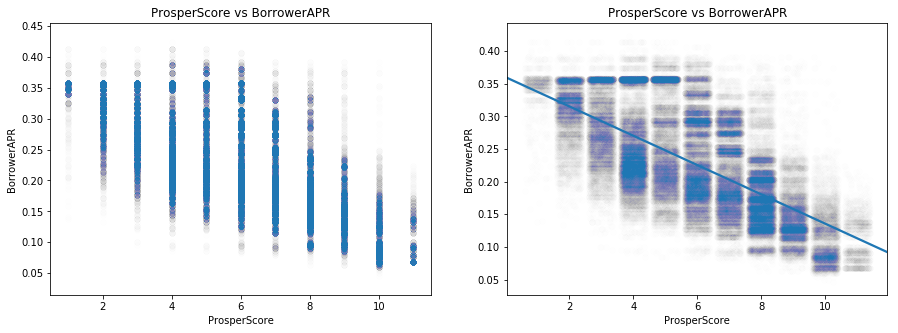

In [12]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# Simple scatter plot
plt.scatter(data = df, x = 'ProsperScore', y = 'BorrowerAPR', alpha = 0.005) # alpha param for Transparency 
plt.title('ProsperScore vs BorrowerAPR')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# scatterplot with regression function fitting
sb.regplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', scatter_kws={'alpha':0.005}, x_jitter = 0.4)
# apply jitter if there is high amount of overlap in points
plt.title('ProsperScore vs BorrowerAPR');

Text(0, 0.5, 'LenderYield')

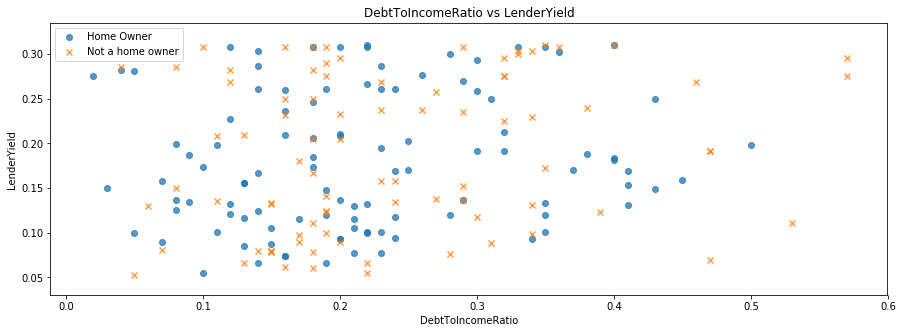

In [13]:
# Another layer of encoding can be added via shapes for a categorical variable
plt.figure(figsize = [15, 5])
plt.scatter(data = df[(df.LoanStatus == 'FinalPaymentInProgress') & (df.IsBorrowerHomeowner == True)], x = 'DebtToIncomeRatio', y = 'LenderYield', alpha = 0.75, marker = 'o')
plt.scatter(data = df[(df.LoanStatus == 'FinalPaymentInProgress') & (df.IsBorrowerHomeowner == False)], x = 'DebtToIncomeRatio', y = 'LenderYield', alpha = 0.75, marker = 'x')
plt.legend(['Home Owner', 'Not a home owner'])
plt.title('DebtToIncomeRatio vs LenderYield')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('LenderYield')

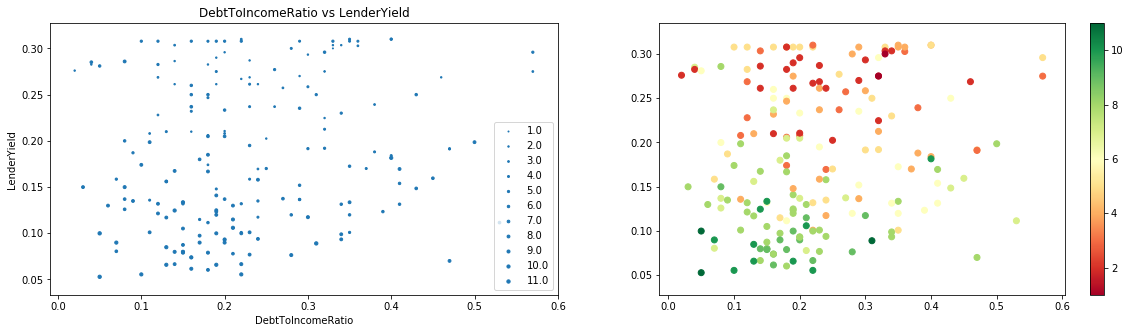

In [14]:
# Another layer of encoding can be added via size/color for a numeric variable
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.scatter(data = df[(df.LoanStatus == 'FinalPaymentInProgress') & (df.ProsperScore.isna() == False)], 
            x = 'DebtToIncomeRatio', y = 'LenderYield', s='ProsperScore')

plt.title('DebtToIncomeRatio vs LenderYield')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('LenderYield')

sizes = np.arange(df.ProsperScore.min(), df.ProsperScore.max() + 1, 1)
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = sb.color_palette()[0]))
plt.legend(legend_obj, sizes)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
plt.scatter(data = df[(df.LoanStatus == 'FinalPaymentInProgress') & (df.ProsperScore.isna() == False)], 
            x = 'DebtToIncomeRatio', y = 'LenderYield', c='ProsperScore', cmap = 'RdYlGn')
plt.colorbar()

# Heat Maps
Alternative to a scatterplot or to plot relationship between two categorical variables
Plotting area is divided into a grid and the number of points in each grid rectangle is added up and counts are indicated by grid cell color

C:\Learning\Anaconda\lib\site-packages\numpy\lib\function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


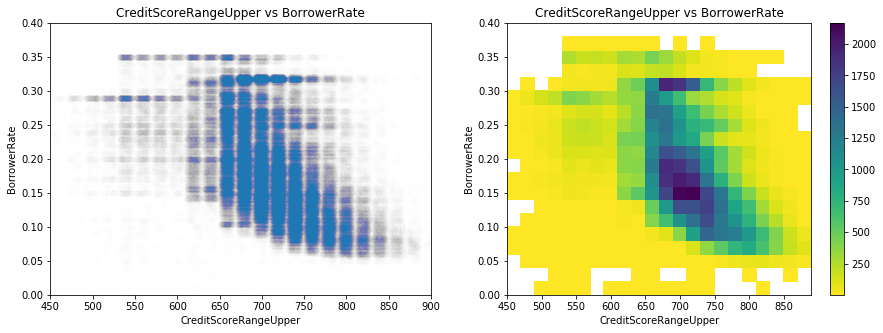

In [15]:
# for two numeric variables
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# scatterplot without regression fitting
sb.regplot(data = df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate',
           fit_reg = False, scatter_kws={'alpha':0.005}, x_jitter = 7.5)
plt.xlim(450, 900)
plt.ylim(0, 0.4)
plt.title('CreditScoreRangeUpper vs BorrowerRate');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# heat map for the same data using matplotlib
bins_x = np.arange(450, 900 + 1, 20)
bins_y = np.arange(0, 0.41, 0.02)
plt.hist2d(data = df, x = 'CreditScoreRangeUpper', y = 'BorrowerRate',
           cmap = 'viridis_r', # reversing the default "viridis" color palette
           cmin = 0.5, # cell will only get colored if it contains at least one point
           bins = [bins_x, bins_y]) 
plt.colorbar()
plt.title('CreditScoreRangeUpper vs BorrowerRate')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerRate');

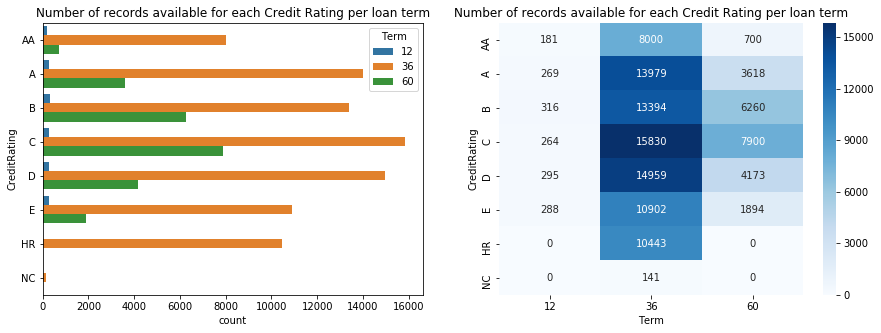

In [16]:
# for two categorical variables
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
# Clustered bar chart using seaborn for comparison
sb.countplot(data = df, y = 'CreditRating', hue = 'Term')
plt.title('Number of records available for each Credit Rating per loan term')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# Heat map for the same data using seaborn with annotations 
sb.heatmap(ct_counts, cmap="Blues", annot = True, fmt = '.0f')
plt.title('Number of records available for each Credit Rating per loan term');

# Violin Plots
Another way of plotting relationship between one quantitative and one qualitative variable

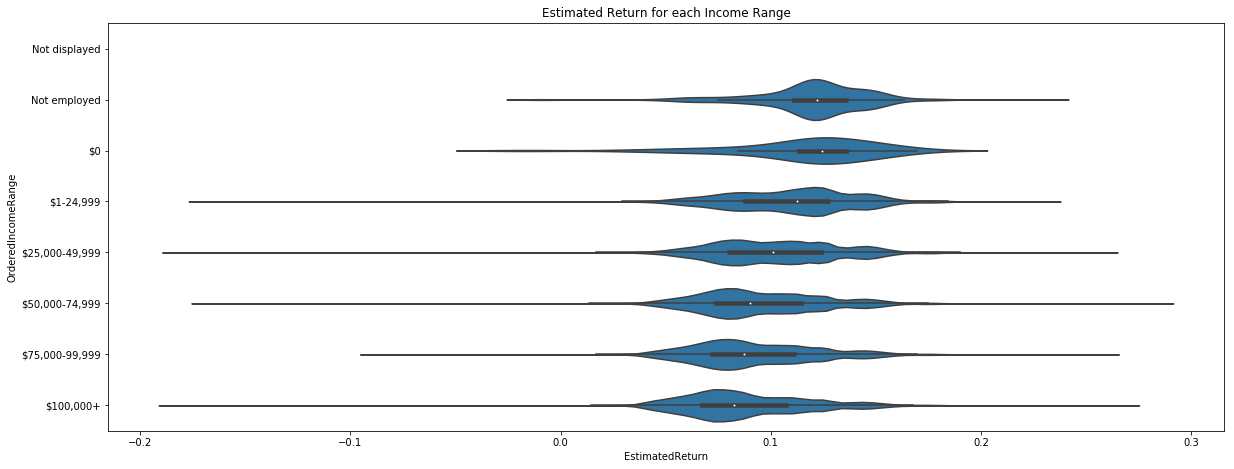

In [17]:
plt.figure(figsize = [20, 7.5])
sb.violinplot(data = df, x = 'EstimatedReturn', y = 'OrderedIncomeRange', color = sb.color_palette()[0])
plt.title('Estimated Return for each Income Range');

# Box Plots
To plot relationship between a numeric variable and a categorical variable.
* The central line in the box indicates the median of the distribution
* The top and bottom of the box represent the third and first quartiles of the data, respectively. 
* Thus, the height of the box is the interquartile range (IQR). 
* From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. 
* Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. 
* For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

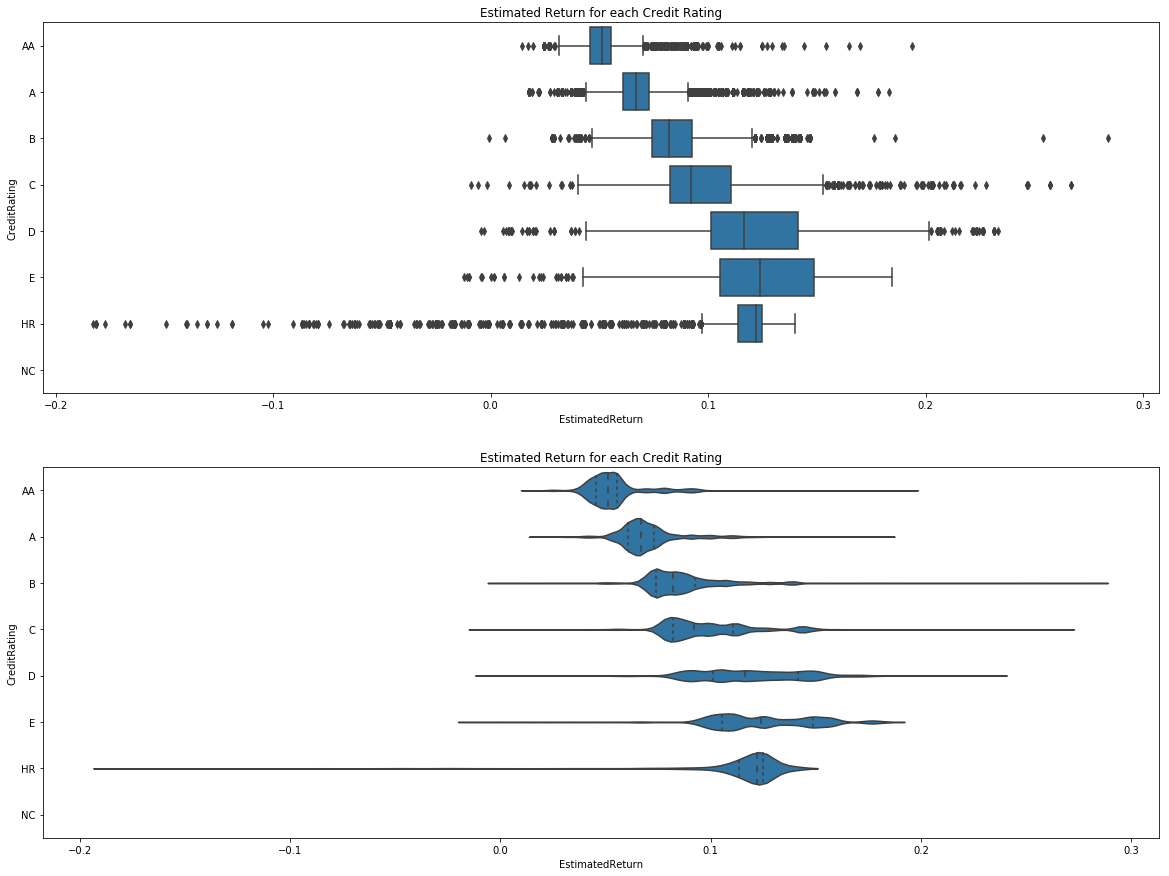

In [18]:
plt.figure(figsize = [20, 15])
plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
sb.boxplot(data = df, x = 'EstimatedReturn', y = 'CreditRating', color = sb.color_palette()[0])
plt.title('Estimated Return for each Credit Rating')

plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
# violin plot for same data with quartiles lines
sb.violinplot(data = df, x = 'EstimatedReturn', y = 'CreditRating', color = sb.color_palette()[0],
             inner = 'quartile') # median, first and third quartiles lines will b plotted
# other options are inner = "stick" and inner = "point"
plt.title('Estimated Return for each Credit Rating');

# Swarm Plots

In [19]:
# Takes too long
#sb.swarmplot(data = df, x = 'EstimatedReturn', y = 'CreditRating', color = sb.color_palette()[0])
#plt.title('Estimated Return for each Credit Rating')

# Faceting
Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall.

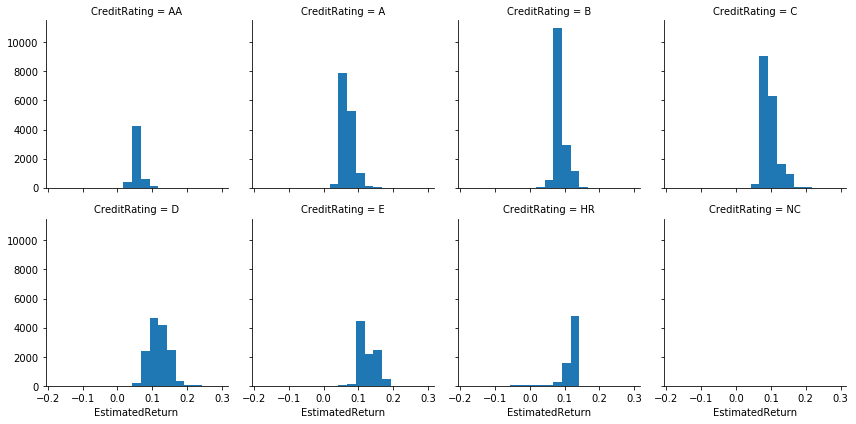

In [20]:
g = sb.FacetGrid(data = df, col = 'CreditRating', col_wrap = 4)
# Setting col_wrap = 4 means that the plots will be organized into rows of 4 facets each
g.map(plt.hist, "EstimatedReturn",
      bins = np.arange(df.EstimatedReturn.min(), df.EstimatedReturn.max()+0.01, 0.025));
#plt.title('Distribution of Estimated Return for each Credit Rating');

In [47]:
# ListingCategory column mappings
# 0 - Not Available, 
# 1 - Debt Consolidation, 
# 2 - Home Improvement, 
# 3 - Business, 
# 4 - Personal Loan, 
# 5 - Student Use, 
# 6 - Auto, 
# 7- Other, 
# 8 - Baby&Adoption, 
# 9 - Boat, 
# 10 - Cosmetic Procedure, 
# 11 - Engagement Ring, 
# 12 - Green Loans, 
# 13 - Household Expenses, 
# 14 - Large Purchases, 
# 15 - Medical/Dental, 
# 16 - Motorcycle, 
# 17 - RV, 
# 18 - Taxes, 
# 19 - Vacation, 
# 20 - Wedding Loans

listing = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'] 
df['ListingCategory'] = df['ListingCategory (numeric)'].apply(lambda x: listing[x])

C:\Learning\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


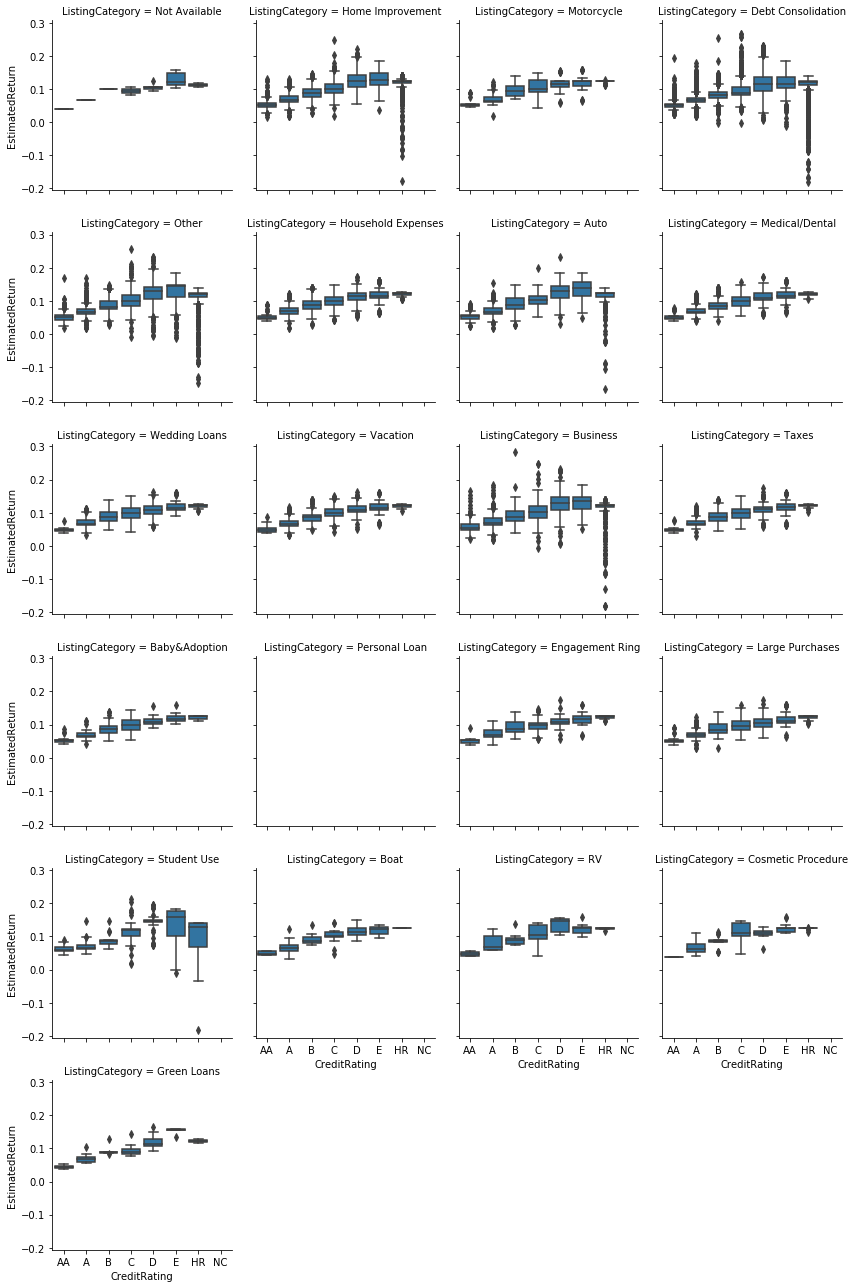

In [49]:
g = sb.FacetGrid(data = df, col = 'ListingCategory', col_wrap = 4, margin_titles = True)
g.map(sb.boxplot, 'CreditRating', 'EstimatedReturn');

# Ridgeline Plots

C:\Learning\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


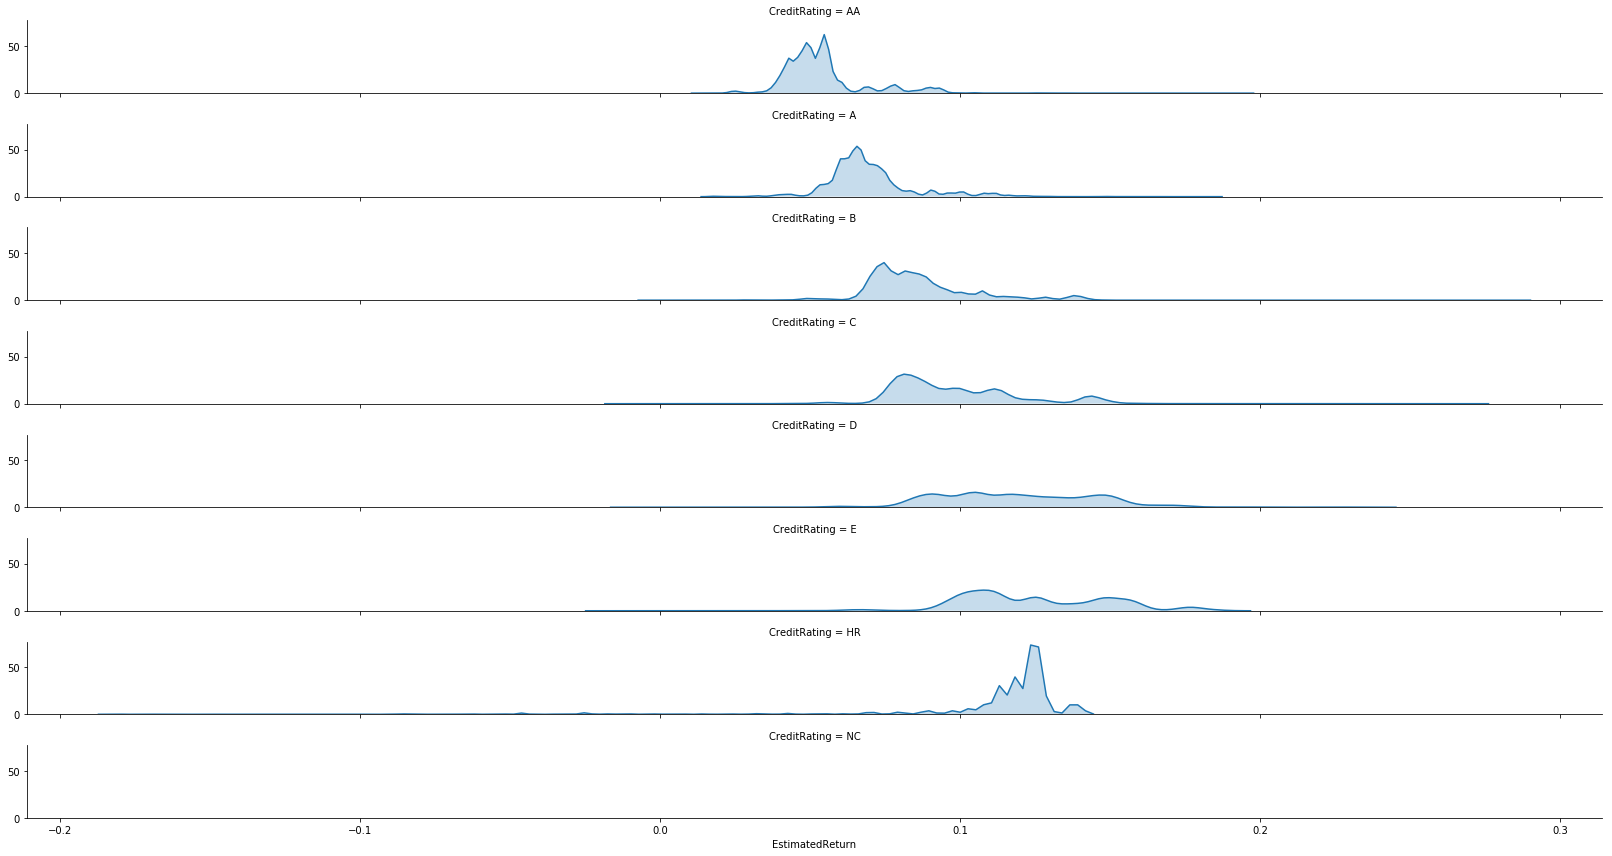

In [21]:
g = sb.FacetGrid(data = df, row = 'CreditRating', size = 1.5, aspect = 15)
g.map(sb.kdeplot, 'EstimatedReturn', shade = True);
#plt.title('Distribution of Estimated Return for each Credit Rating');

# Line Plots

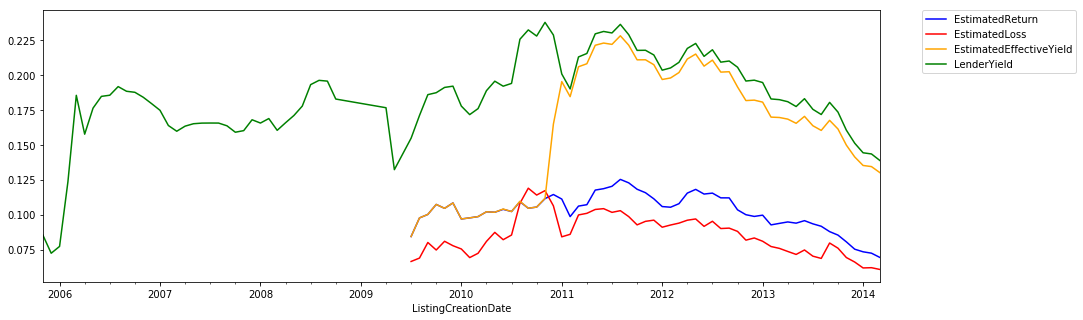

In [22]:
plt.figure(figsize = [15, 5])

monthly = df.ListingCreationDate.dt.to_period("M")

return_per_month = df[df.EstimatedReturn.isna() == False].groupby(monthly).EstimatedReturn.mean() 
loss_per_month = df[df.EstimatedLoss.isna() == False].groupby(monthly).EstimatedLoss.mean() 
yield_per_month = df[df.EstimatedEffectiveYield.isna() == False].groupby(monthly).EstimatedEffectiveYield.mean() 
lender_yield_per_month = df[df.LenderYield.isna() == False].groupby(monthly).LenderYield.mean() 

return_per_month.plot(color = 'blue')
loss_per_month.plot(color = 'red')
yield_per_month.plot(color = 'orange')
lender_yield_per_month.plot(color = 'green')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);